In [1]:
import os
from dotenv import load_dotenv

load_dotenv("../../.env")

True

In [2]:
key = os.environ["AZURE_OPENAI_API_KEY"]
endpoint = os.environ["AZURE_OPENAI_ENDPOINT"]

In [3]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient

credential = AzureKeyCredential(key)
document_analysis_client = DocumentIntelligenceClient(endpoint, credential)

In [4]:
# from pypdf import PdfReader, PdfWriter

# reader = PdfReader("../data/pdf/DX白書2023.pdf")

# # pickup page: 11-16
# writer = PdfWriter()

# for pg in range(10, 16):
#     writer.add_page(reader.pages[pg])

# writer.write("../data/pdf/pickup_dx_paper_2023.pdf")

In [27]:
# pdf_file = "../data/pdf/DX白書2023.pdf"
# pdf_file = "../data/pdf/sample-layout.pdf"
pdf_file = "../data/pdf/pickup_dx_paper_2023.pdf"
pdf_file

'../data/pdf/pickup_dx_paper_2023.pdf'

In [6]:
from azure.core.credentials import AzureKeyCredential
from azure.ai.documentintelligence import DocumentIntelligenceClient
from azure.ai.documentintelligence.models import AnalyzeResult, ContentFormat

In [7]:
document_intelligence_client = DocumentIntelligenceClient(endpoint=endpoint, credential=AzureKeyCredential(key))
with open(pdf_file, "rb") as f:
    poller = document_intelligence_client.begin_analyze_document(
        "prebuilt-layout",
        analyze_request=f,
        content_type="application/octet-stream",
        output_content_format=ContentFormat.MARKDOWN,
    )
result: AnalyzeResult = poller.result()

In [8]:
result

{'apiVersion': '2024-02-29-preview', 'modelId': 'prebuilt-layout', 'stringIndexType': 'textElements', 'content': '<!-- PageHeader="第1章" -->\n\n国内産業におけるDXの取組状況の俯瞰\n===\n\n\n# 1 はじめに\n\n第1章では、我が国における企業のDXの取組を概観した俯瞰図を作成する「全体俯瞰調査」(以下、本 章では「本調査」と言う)の概要を説明する。DXの取組状況を俯瞰図で可視化することにより、DXに 取組んでいたり取組もうとしている企業などが規模や産業、地域などの視点から自社の取組に参考と なる具体的な事例を参照できるほか、業務改革から事業改革への展開や周辺地域の取組との連携など を図る際の参考となると想定している。\n\n\n## 2 調査の概要\n\n本調査の構成を図表1-1に示す。まず、公開されている国内企業のDXの取組に関するアンケート調査 などを分析し、DXの取組状況の傾向をマクロ的に捉え、DXの取組状況と実施主体の属性との関係を 明らかにすることで、DX事例を整理するための軸(以降、「整理軸」と言う)を決定した(以降、「マクロ 調査」と言う)。そのうえで、我が国のDX事例を収集し(以降、「DX事例調査」と言う)、整理軸に基づいて 俯瞰図(以降、「俯瞰図」と言う)として整理した。\n\n<figure>\n\n![](figures/0)\n\n<!-- FigureContent="図表1-1 本調査の構成 マクロ調査 DX事例調査 俯瞰図作成 複数の既存公開アンケート調査をマクロ的に 把握し、DXの取組状況を整理するための軸 (企業規模、産業、地域等)を抽出 俯瞰図の整理軸(企業規模、産業、地域 等)に基づいて、我が国のDX事例を収集 収集した我が国のDX事例内容を整理軸に 基づいてマッピングし、俯瞰図を作成" -->\n\n</figure>\n\n\n<!-- PageFooter="DX白書2023" -->\n\n<!-- PageNumber="002" -->\n:unselected:\n<!-- PageHeader="一第1部一第1章一 国内産業におけるDXの取組状況の俯瞰" --

In [9]:
print(result.content)

<!-- PageHeader="第1章" -->

国内産業におけるDXの取組状況の俯瞰
===


# 1 はじめに

第1章では、我が国における企業のDXの取組を概観した俯瞰図を作成する「全体俯瞰調査」(以下、本 章では「本調査」と言う)の概要を説明する。DXの取組状況を俯瞰図で可視化することにより、DXに 取組んでいたり取組もうとしている企業などが規模や産業、地域などの視点から自社の取組に参考と なる具体的な事例を参照できるほか、業務改革から事業改革への展開や周辺地域の取組との連携など を図る際の参考となると想定している。


## 2 調査の概要

本調査の構成を図表1-1に示す。まず、公開されている国内企業のDXの取組に関するアンケート調査 などを分析し、DXの取組状況の傾向をマクロ的に捉え、DXの取組状況と実施主体の属性との関係を 明らかにすることで、DX事例を整理するための軸(以降、「整理軸」と言う)を決定した(以降、「マクロ 調査」と言う)。そのうえで、我が国のDX事例を収集し(以降、「DX事例調査」と言う)、整理軸に基づいて 俯瞰図(以降、「俯瞰図」と言う)として整理した。

<figure>

![](figures/0)

<!-- FigureContent="図表1-1 本調査の構成 マクロ調査 DX事例調査 俯瞰図作成 複数の既存公開アンケート調査をマクロ的に 把握し、DXの取組状況を整理するための軸 (企業規模、産業、地域等)を抽出 俯瞰図の整理軸(企業規模、産業、地域 等)に基づいて、我が国のDX事例を収集 収集した我が国のDX事例内容を整理軸に 基づいてマッピングし、俯瞰図を作成" -->

</figure>


<!-- PageFooter="DX白書2023" -->

<!-- PageNumber="002" -->
:unselected:
<!-- PageHeader="一第1部一第1章一 国内産業におけるDXの取組状況の俯瞰" -->

<figure>

![](figures/1)

<!-- FigureContent="3" -->

</figure>

 国内産業におけるDXの取組状況の概観(マクロ調査)

民間企業、官公庁(民間への委託含む)、各種団体が実施したアンケート調査結果など、幅広い資料を

In [25]:
result

{'apiVersion': '2024-02-29-preview', 'modelId': 'prebuilt-layout', 'stringIndexType': 'textElements', 'content': '<!-- PageHeader="第1章" -->\n\n国内産業におけるDXの取組状況の俯瞰\n===\n\n\n# 1 はじめに\n\n第1章では、我が国における企業のDXの取組を概観した俯瞰図を作成する「全体俯瞰調査」(以下、本 章では「本調査」と言う)の概要を説明する。DXの取組状況を俯瞰図で可視化することにより、DXに 取組んでいたり取組もうとしている企業などが規模や産業、地域などの視点から自社の取組に参考と なる具体的な事例を参照できるほか、業務改革から事業改革への展開や周辺地域の取組との連携など を図る際の参考となると想定している。\n\n\n## 2 調査の概要\n\n本調査の構成を図表1-1に示す。まず、公開されている国内企業のDXの取組に関するアンケート調査 などを分析し、DXの取組状況の傾向をマクロ的に捉え、DXの取組状況と実施主体の属性との関係を 明らかにすることで、DX事例を整理するための軸(以降、「整理軸」と言う)を決定した(以降、「マクロ 調査」と言う)。そのうえで、我が国のDX事例を収集し(以降、「DX事例調査」と言う)、整理軸に基づいて 俯瞰図(以降、「俯瞰図」と言う)として整理した。\n\n<figure>\n\n![](figures/0)\n\n<!-- FigureContent="図表1-1 本調査の構成 マクロ調査 DX事例調査 俯瞰図作成 複数の既存公開アンケート調査をマクロ的に 把握し、DXの取組状況を整理するための軸 (企業規模、産業、地域等)を抽出 俯瞰図の整理軸(企業規模、産業、地域 等)に基づいて、我が国のDX事例を収集 収集した我が国のDX事例内容を整理軸に 基づいてマッピングし、俯瞰図を作成" -->\n\n</figure>\n\n\n<!-- PageFooter="DX白書2023" -->\n\n<!-- PageNumber="002" -->\n:unselected:\n<!-- PageHeader="一第1部一第1章一 国内産業におけるDXの取組状況の俯瞰" --

In [ ]:
for page in result.pages:
    print("-" * 120)
    for ldx, line in enumerate(page.lines):
        print(f"{ldx:03d}: {line.content}")

    for smk in page.selection_marks:
        print(smk.state, f"({smk.confidence})")

------------------------------------------------------------------------------------------------------------------------
000: <!-- PageHeader="第1章" -->
001: 国内産業におけるDXの取組状況の俯瞰
===
002: # 1
003: はじめに
004: 第1章では、我が国における企業のDXの取組を概観した俯瞰図を作成する「全体俯瞰調査」(以下、本
005: 章では「本調査」と言う)の概要を説明する。DXの取組状況を俯瞰図で可視化することにより、DXに
006: 取組んでいたり取組もうとしている企業などが規模や産業、地域などの視点から自社の取組に参考と
007: なる具体的な事例を参照できるほか、業務改革から事業改革への展開や周辺地域の取組との連携など
008: を図る際の参考となると想定している。
009: ## 2 調査の概要
010: 本調査の構成を図表1-1に示す。まず、公開されている国内企業のDXの取組に関するアンケート調査
011: などを分析し、DXの取組状況の傾向をマクロ的に捉え、DXの取組状況と実施主体の属性との関係を
012: 明らかにすることで、DX事例を整理するための軸(以降、「整理軸」と言う)を決定した(以降、「マクロ
013: 調査」と言う)。そのうえで、我が国のDX事例を収集し(以降、「DX事例調査」と言う)、整理軸に基づいて
014: 俯瞰図(以降、「俯瞰図」と言う)として整理した。
015: <!-- FigureContent="図表1-1
016: 本調査の構成
017: マクロ調査
018: DX事例調査
019: 俯瞰図作成
020: 複数の既存公開アンケート調査をマクロ的に
021: 把握し、DXの取組状況を整理するための軸
022: (企業規模、産業、地域等)を抽出
023: 俯瞰図の整理軸(企業規模、産業、地域
024: 等)に基づいて、我が国のDX事例を収集
025: 収集した我が国のDX事例内容を整理軸に
026: 基づいてマッピングし、俯瞰図を作成" -->
027: <!-- PageFooter="DX白書2023" -->
028: <!-- PageNum

In [56]:
# cf. https://techcommunity.microsoft.com/t5/ai-azure-ai-services-blog/build-intelligent-rag-for-multimodality-and-complex-document/ba-p/4118184
from PIL import Image
import fitz  # PyMuPDF


def crop_image_from_pdf_page(pdf_path, page_number, bounding_box) -> Image.Image:
    """
    Crops a region from a given page in a PDF and returns it as an image.

    :param pdf_path: Path to the PDF file.
    :param page_number: The page number to crop from (0-indexed).
    :param bounding_box: A tuple of (x0, y0, x1, y1) coordinates for the bounding box.
    :return: A PIL Image of the cropped area.
    """
    pdx = page_number - 1
    # doc = fitz.open(pdf_path)
    with fitz.open(pdf_path) as doc:
        page = doc.load_page(pdx)

        # Cropping the page. The rect requires the coordinates in the format (x0, y0, x1, y1).
        # The coordinates are in points (1/72 inch).
        bbx = [x * 72 for x in bounding_box]
        rect = fitz.Rect(bbx)
        pix = page.get_pixmap(matrix=fitz.Matrix(300 / 72, 300 / 72), clip=rect)

        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # doc.close()

    return img

In [53]:
# for idx, style in enumerate(result.styles):
#     print("Document contains {} content".format("handwritten" if style.is_handwritten else "no handwritten"))

page: 1 (0.7949, 5.9555, 7.302, 7.4455)


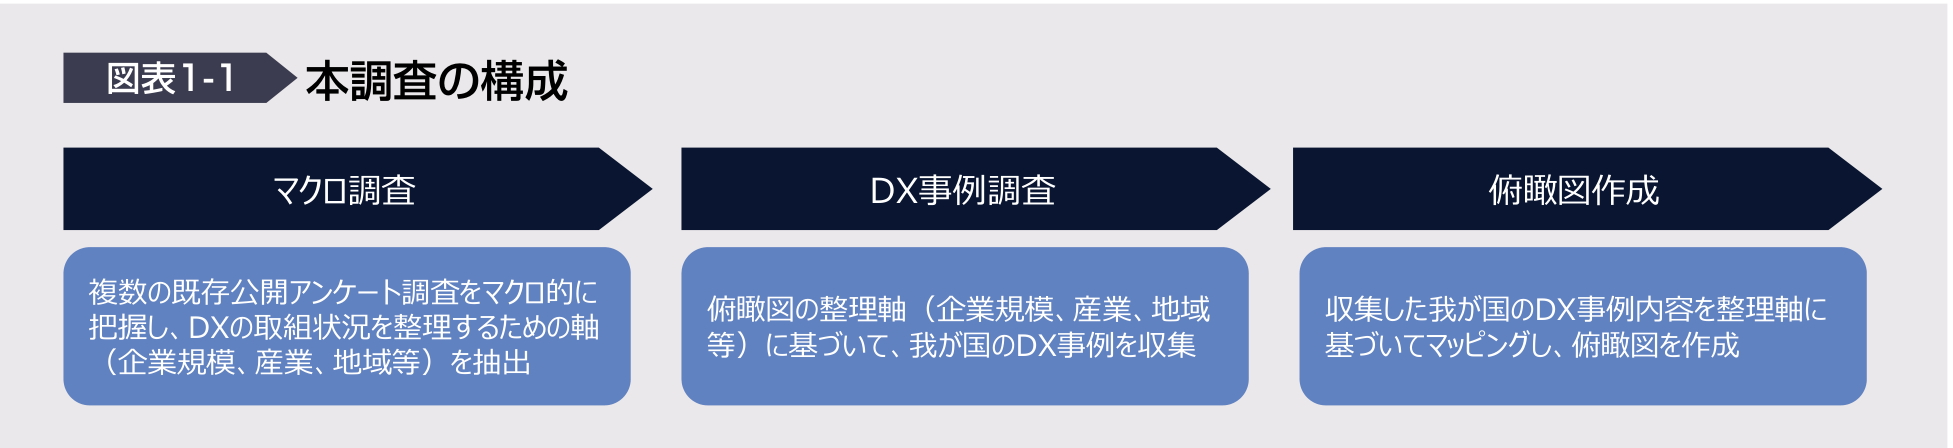

In [66]:
for idx, fg in enumerate(result.figures):
    region = fg["boundingRegions"][0]
    n_page = region["pageNumber"]
    polygon = region["polygon"]
    bounding_box = (polygon[0], polygon[1], polygon[4], polygon[5])
    print(f"page: {n_page}", bounding_box)
    img = crop_image_from_pdf_page(pdf_file, n_page, bounding_box)
    break

img

In [69]:
type(img)

PIL.Image.Image

In [72]:
import base64
import PIL.Image
from io import BytesIO


def encode_image_from_pil(pil_image: PIL.Image.Image):

    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [73]:
from openai import OpenAI


def analyze_image(img: PIL.Image.Image):
    client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))
    base64_image = encode_image_from_pil(img)

    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": """
    # 依頼内容
    画像を限りなく正確に読み取ってください

    # 要件

    - 読み取った内容を正確に文章で説明してください
    - 構造的な図であれば、その図を marmaid 記法で追加表現してください

    """,
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/png;base64,{base64_image}"},
                    },
                ],
            }
        ],
        max_tokens=2048,
    )
    return response.choices[0].message.content

In [75]:
analyzed_text: str = analyze_image(img)
analyzed_text

'画像には、「図表1-1 本調査の構成」というタイトルの図が示されています。この図は、3つの主要なプロセスを示しています。\n\n1. マクロ調査\n    - 複数の既存公開アンケート調査をマクロ的に把握し、DXの取組状況を整理するための軸（企業規模、産業、地域等）を抽出\n\n2. DX事例調査\n    - 俯瞰図の整理軸（企業規模、産業、地域等）に基づいて、我が国のDX事例を収集\n\n3. 俯瞰図作成\n    - 収集した我が国のDX事例内容を整理軸に基づいてマッピングし、俯瞰図を作成\n\n以下、mermaid記法でこの図を表現します。\n\n```mermaid\ngraph LR\n    A[マクロ調査] --> B[DX事例調査] --> C[俯瞰図作成]\n    \n    A --- |複数の既存公開アンケート調査をマクロ的に把握し、DXの取組状況を整理するための軸（企業規模、産業、地域等）を抽出|\n    B --- |俯瞰図の整理軸（企業規模、産業、地域等）に基づいて、我が国のDX事例を収集|\n    C --- |収集した我が国のDX事例内容を整理軸に基づいてマッピングし、俯瞰図を作成|\n```'

In [76]:
print(analyzed_text)

画像には、「図表1-1 本調査の構成」というタイトルの図が示されています。この図は、3つの主要なプロセスを示しています。

1. マクロ調査
    - 複数の既存公開アンケート調査をマクロ的に把握し、DXの取組状況を整理するための軸（企業規模、産業、地域等）を抽出

2. DX事例調査
    - 俯瞰図の整理軸（企業規模、産業、地域等）に基づいて、我が国のDX事例を収集

3. 俯瞰図作成
    - 収集した我が国のDX事例内容を整理軸に基づいてマッピングし、俯瞰図を作成

以下、mermaid記法でこの図を表現します。

```mermaid
graph LR
    A[マクロ調査] --> B[DX事例調査] --> C[俯瞰図作成]
    
    A --- |複数の既存公開アンケート調査をマクロ的に把握し、DXの取組状況を整理するための軸（企業規模、産業、地域等）を抽出|
    B --- |俯瞰図の整理軸（企業規模、産業、地域等）に基づいて、我が国のDX事例を収集|
    C --- |収集した我が国のDX事例内容を整理軸に基づいてマッピングし、俯瞰図を作成|
```


In [77]:
import re

In [97]:
fig_idx: int = 0
replaced = re.sub(
    # r"(<figure>)(.*?\(figures/0\).*?)(</figure>)",
    # f"\\1 <!-- {analyzed_text} --> \\3",
    f"(<figure>.*?(figures/{fig_idx}).*?</figure>)",
    f"\\1\n=====\n{analyzed_text}\n=====\n",
    result.content,
    flags=(re.MULTILINE | re.DOTALL),
)
print(replaced)

<!-- PageHeader="第1章" -->

国内産業におけるDXの取組状況の俯瞰
===


# 1 はじめに

第1章では、我が国における企業のDXの取組を概観した俯瞰図を作成する「全体俯瞰調査」(以下、本 章では「本調査」と言う)の概要を説明する。DXの取組状況を俯瞰図で可視化することにより、DXに 取組んでいたり取組もうとしている企業などが規模や産業、地域などの視点から自社の取組に参考と なる具体的な事例を参照できるほか、業務改革から事業改革への展開や周辺地域の取組との連携など を図る際の参考となると想定している。


## 2 調査の概要

本調査の構成を図表1-1に示す。まず、公開されている国内企業のDXの取組に関するアンケート調査 などを分析し、DXの取組状況の傾向をマクロ的に捉え、DXの取組状況と実施主体の属性との関係を 明らかにすることで、DX事例を整理するための軸(以降、「整理軸」と言う)を決定した(以降、「マクロ 調査」と言う)。そのうえで、我が国のDX事例を収集し(以降、「DX事例調査」と言う)、整理軸に基づいて 俯瞰図(以降、「俯瞰図」と言う)として整理した。

<figure>

![](figures/0)

<!-- FigureContent="図表1-1 本調査の構成 マクロ調査 DX事例調査 俯瞰図作成 複数の既存公開アンケート調査をマクロ的に 把握し、DXの取組状況を整理するための軸 (企業規模、産業、地域等)を抽出 俯瞰図の整理軸(企業規模、産業、地域 等)に基づいて、我が国のDX事例を収集 収集した我が国のDX事例内容を整理軸に 基づいてマッピングし、俯瞰図を作成" -->

</figure>
=====
画像には、「図表1-1 本調査の構成」というタイトルの図が示されています。この図は、3つの主要なプロセスを示しています。

1. マクロ調査
    - 複数の既存公開アンケート調査をマクロ的に把握し、DXの取組状況を整理するための軸（企業規模、産業、地域等）を抽出

2. DX事例調査
    - 俯瞰図の整理軸（企業規模、産業、地域等）に基づいて、我が国のDX事例を収集

3. 俯瞰図作成
    - 収集した我が国のDX事例内容を整理軸に基づいてマッピングし、俯瞰図を作成

以下、mermaid記法でこの

In [31]:
print(result.content)

<!-- PageHeader="第1章" -->

国内産業におけるDXの取組状況の俯瞰
===


# 1 はじめに

第1章では、我が国における企業のDXの取組を概観した俯瞰図を作成する「全体俯瞰調査」(以下、本 章では「本調査」と言う)の概要を説明する。DXの取組状況を俯瞰図で可視化することにより、DXに 取組んでいたり取組もうとしている企業などが規模や産業、地域などの視点から自社の取組に参考と なる具体的な事例を参照できるほか、業務改革から事業改革への展開や周辺地域の取組との連携など を図る際の参考となると想定している。


## 2 調査の概要

本調査の構成を図表1-1に示す。まず、公開されている国内企業のDXの取組に関するアンケート調査 などを分析し、DXの取組状況の傾向をマクロ的に捉え、DXの取組状況と実施主体の属性との関係を 明らかにすることで、DX事例を整理するための軸(以降、「整理軸」と言う)を決定した(以降、「マクロ 調査」と言う)。そのうえで、我が国のDX事例を収集し(以降、「DX事例調査」と言う)、整理軸に基づいて 俯瞰図(以降、「俯瞰図」と言う)として整理した。

<figure>

![](figures/0)

<!-- FigureContent="図表1-1 本調査の構成 マクロ調査 DX事例調査 俯瞰図作成 複数の既存公開アンケート調査をマクロ的に 把握し、DXの取組状況を整理するための軸 (企業規模、産業、地域等)を抽出 俯瞰図の整理軸(企業規模、産業、地域 等)に基づいて、我が国のDX事例を収集 収集した我が国のDX事例内容を整理軸に 基づいてマッピングし、俯瞰図を作成" -->

</figure>


<!-- PageFooter="DX白書2023" -->

<!-- PageNumber="002" -->
:unselected:
<!-- PageHeader="一第1部一第1章一 国内産業におけるDXの取組状況の俯瞰" -->

<figure>

![](figures/1)

<!-- FigureContent="3" -->

</figure>

 国内産業におけるDXの取組状況の概観(マクロ調査)

民間企業、官公庁(民間への委託含む)、各種団体が実施したアンケート調査結果など、幅広い資料を

In [ ]:
for idx, style in enumerate(result.styles):
    print("Document contains {} content".format("handwritten" if style.is_handwritten else "no handwritten"))

for page in result.pages:
    print("----Analyzing layout from page #{}----".format(page.page_number))
    print("Page has width: {} and height: {}, measured with unit: {}".format(page.width, page.height, page.unit))

    for line_idx, line in enumerate(page.lines):
        words = line.get_words()
        print(
            "...Line # {} has word count {} and text '{}' within bounding polygon '{}'".format(
                line_idx,
                len(words),
                line.content,
                line.polygon,
            )
        )

        for word in words:
            print("......Word '{}' has a confidence of {}".format(word.content, word.confidence))

    for smk in page.selection_marks:
        print(
            "...Selection mark is '{}' within bounding polygon '{}' and has a confidence of {}".format(
                smk.state,
                smk.polygon,
                smk.confidence,
            )
        )

In [ ]:
for table_idx, table in enumerate(result.tables):
    print("Table # {} has {} rows and {} columns".format(table_idx, table.row_count, table.column_count))
    for region in table.bounding_regions:
        print(
            "Table # {} location on page: {} is {}".format(
                table_idx,
                region.page_number,
                region.polygon,
            )
        )
    for cell in table.cells:
        print(
            "...Cell[{}][{}] has content '{}'".format(
                cell.row_index,
                cell.column_index,
                cell.content,
            )
        )
        for region in cell.bounding_regions:
            print(
                "...content on page {} is within bounding polygon '{}'".format(
                    region.page_number,
                    region.polygon,
                )
            )

print("----------------------------------------")